# Fake News Detection

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Importing the libraries required
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
import numpy as np # linear algebra
import pandas as pd #data processing
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import os
import re
import nltk

In [ ]:
train=pd.read_csv('/content/gdrive/MyDrive/ML_Project/train.csv')

In [ ]:
train.head()#Real news =0 and Fake news =1

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
print(train.shape)

(20800, 5)


In [ ]:
#Checking for null values
print(train.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64


In [ ]:
#Dropping Null Values
train=train.dropna()

In [ ]:
print(train.isnull().sum())

id        0
title     0
author    0
text      0
label     0
dtype: int64


In [ ]:
print(train.shape)

(18285, 5)


In [ ]:
#to add text in one coloumn
train['total']=train['title']+' '+train['text']

In [ ]:
train['label'].value_counts()

0    10361
1     7924
Name: label, dtype: int64

# Visualization 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


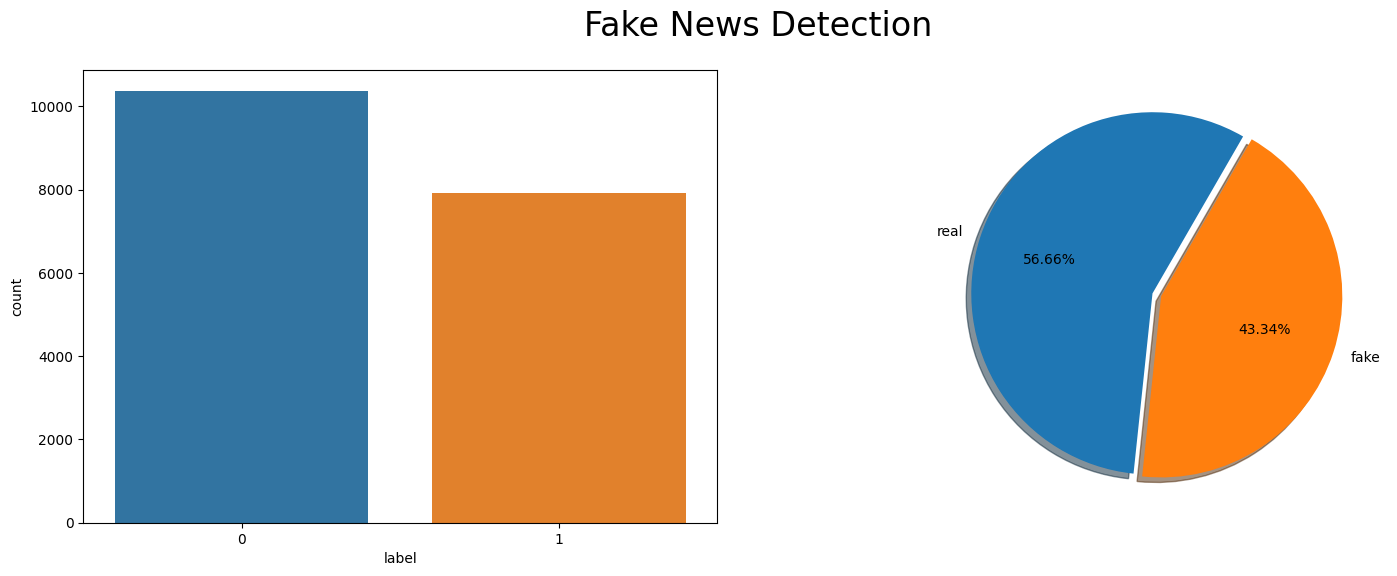

In [ ]:
# Displaying target distribution.

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), dpi=100)
sns.countplot(train['label'], ax=axes[0])
axes[1].pie(train['label'].value_counts(),
            labels=['real', 'fake'],
            autopct='%1.2f%%',
            shadow=True,
            explode=(0.05, 0),
            startangle=60)
fig.suptitle('Fake News Detection', fontsize=24)
plt.show()

# Data Cleaning

In [ ]:
#Using NLTK for preprocessing
nltk.download("stopwords")
from nltk.corpus import stopwords
tokenizer=RegexpTokenizer(r'\w+')#intiating tokenizer as regualar expression tokenizer 
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train['total']=train['total'].apply(lambda x:tokenizer.tokenize(x.lower()))
train['total'].head()

0    [house, dem, aide, we, didn, t, even, see, com...
1    [flynn, hillary, clinton, big, woman, on, camp...
2    [why, the, truth, might, get, you, fired, why,...
3    [15, civilians, killed, in, single, us, airstr...
4    [iranian, woman, jailed, for, fictional, unpub...
Name: total, dtype: object

In [ ]:
#Removing Stopwords
def remove_stopwords(text):
    words=[w for w in text if  not w in stop_words]
    return words
train['total']=train['total'].apply(lambda x:remove_stopwords(x))
train['total'].head()

0    [house, dem, aide, even, see, comey, letter, j...
1    [flynn, hillary, clinton, big, woman, campus, ...
2    [truth, might, get, fired, truth, might, get, ...
3    [15, civilians, killed, single, us, airstrike,...
4    [iranian, woman, jailed, fictional, unpublishe...
Name: total, dtype: object

In [ ]:
import nltk
nltk.download('wordnet')
  

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#Lemmatizing the text to get the root word
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
def word_lemmatizer(text):
    lem_text=' '.join([lemmatizer.lemmatize(i) for i in text])
    return lem_text
train['total']=train['total'].apply(lambda x:word_lemmatizer(x))
train['total'].head()

0    house dem aide even see comey letter jason cha...
1    flynn hillary clinton big woman campus breitba...
2    truth might get fired truth might get fired oc...
3    15 civilian killed single u airstrike identifi...
4    iranian woman jailed fictional unpublished sto...
Name: total, dtype: object

# Word Cloud for Analysis

Text(0.5, 1.0, 'The most frequent words generated in Real Articles')

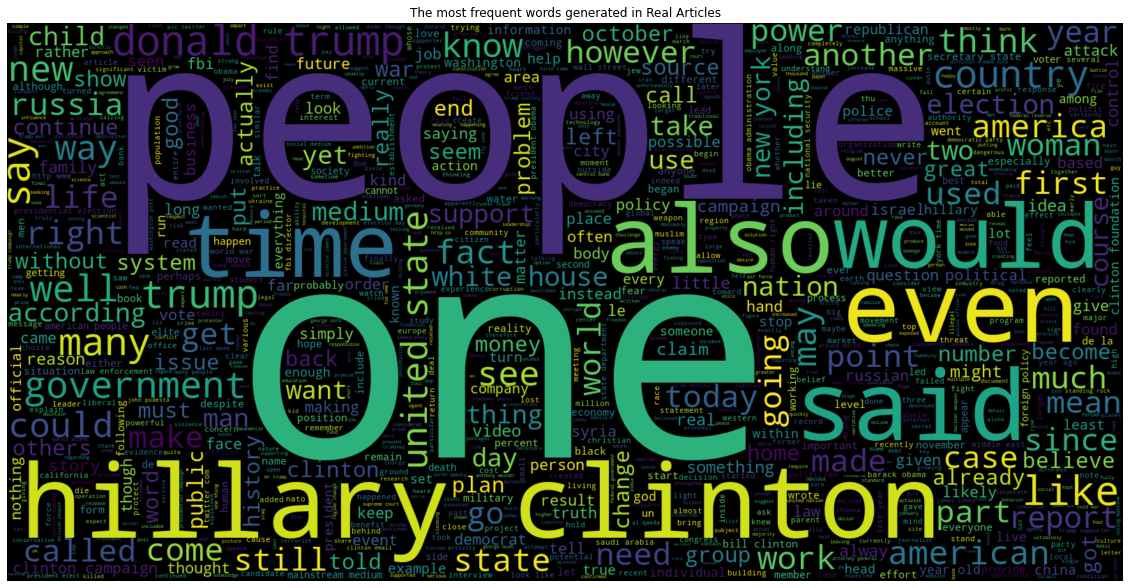

In [ ]:
#Analysing the most words produced in real articles
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(train[train.label == 1].total))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.title("The most frequent words generated in Real Articles")

Text(0.5, 1.0, 'The most frequent words generated in Fake Articles')

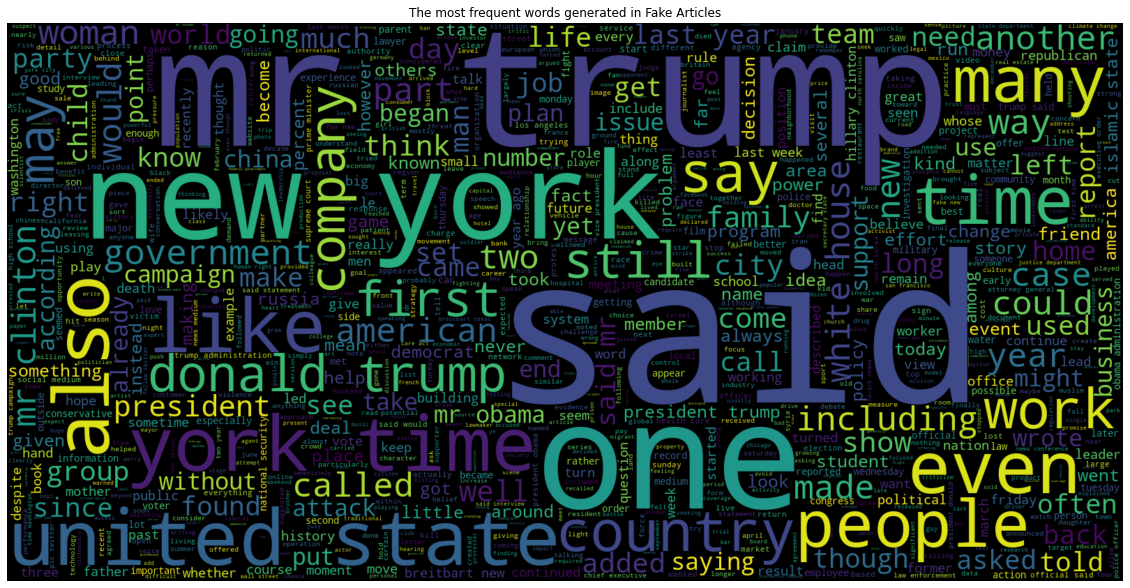

In [ ]:
#Analysing the most words produced in fake articles
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(train[train.label == 0].total))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.title("The most frequent words generated in Fake Articles")

In [ ]:
# Most frequent words counter
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

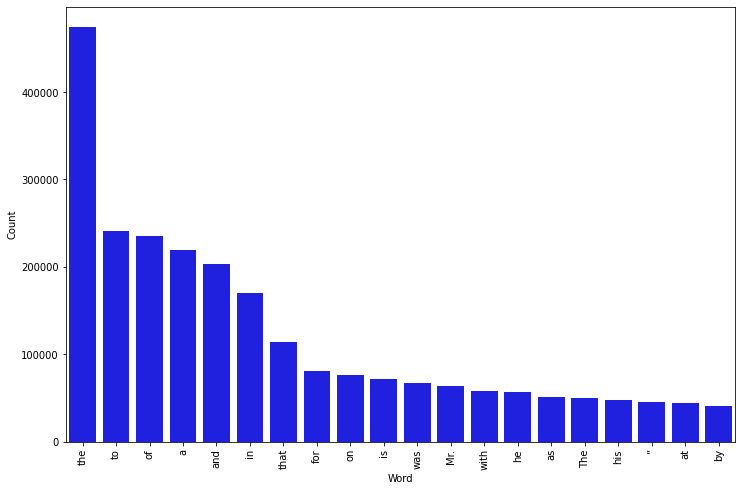

In [ ]:
counter(train[train["label"] == 0], "text", 20)

# Vectorizing

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

#cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=4000)

X = tfidf.fit_transform(train['total'].values.astype('U')).toarray()

In [ ]:
Y=train['label']

In [ ]:
print(X.shape)

(18285, 4000)


In [ ]:
print(Y.shape)

(18285,)


**KNN** **Scratch**

In [ ]:
accuracies=[]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.001, random_state = 2 )

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
def distance(instance1, instance2):
  instance1, instance2 = np.array(instance1), np.array(instance2)
  return np.sqrt(sum((instance1 - instance2)**2))

def get_neighbors(training_set, test_instance, k):
  distances = [(i, distance(test_instance, instance)) for i, instance in enumerate(training_set)]
  distances.sort(key=lambda x: x[1])
  return [i[0] for i in distances[:k]]
  
def make_prediction(neighbor_index, label):
  label = np.array(label)
  neighbor_label = label[neighbor_index]
  prediction = {}
  for x in neighbor_label:
    if x in prediction:
      prediction[x] += 1
    else:
      prediction[x] = 1
  total = sum(prediction.values())
  probability_prediction = {k: v/total for k, v in prediction.items()}
  return probability_prediction
  
def knn_classifier(training_set, label, test_set, k):
  result = []
  for instance in test_set:
    neighbor_index = get_neighbors(training_set, instance, k)
    prediction = make_prediction(neighbor_index, label)
    result.append(max(prediction, key=prediction.get))
  return np.array(result)

In [ ]:
Y_predict = knn_classifier(X_train, Y_train, X_test, 3)

Accuracy: 0.6842105263157895


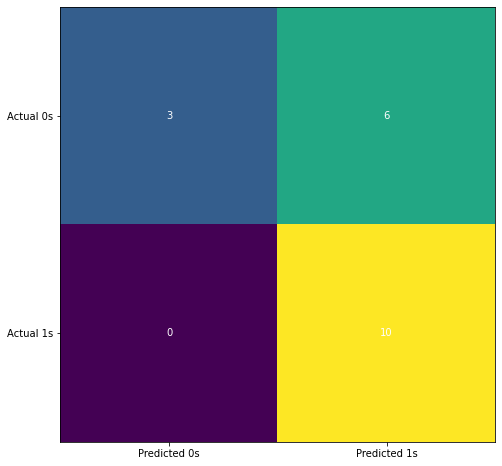

Precision: 0.625
Recall: 1.0


In [ ]:
import sklearn.metrics as metrics

KNN_scratch_accuracy=metrics.accuracy_score(Y_test, Y_predict)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_predict))
cm = confusion_matrix(Y_test,Y_predict)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()
print("Precision:",metrics.precision_score(Y_test, Y_predict))

print("Recall:",metrics.recall_score(Y_test, Y_predict))

In [ ]:
print(KNN_scratch_accuracy)

0.6842105263157895


In [ ]:
accuracies.append(KNN_scratch_accuracy)

In [ ]:
modelName=[]

In [ ]:
modelName.append("KNN_s")

**KNN_sklearn**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3)

classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

In [ ]:
import sklearn.metrics as metrics

KNN_accuracy=metrics.accuracy_score(Y_test, Y_pred)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

print("Precision:",metrics.precision_score(Y_test, Y_pred))

print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.6842105263157895
Precision: 0.625
Recall: 1.0


In [ ]:
modelName.append("KNN_i")

In [ ]:
accuracies.append(KNN_accuracy)

**Logistic_scratch**

In [ ]:
class LogisticRegression:
    
    # defining parameters such as learning rate, number ot iterations, whether to include intercept, 
    # and verbose which says whether to print anything or not like, loss etc.
    def __init__(self, learning_rate=0.01, num_iterations=50000, fit_intercept=True, verbose=False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    # function to define the Incercept value.
    def __b_intercept(self, X):
        # initially we set it as all 1's
        intercept = np.ones((X.shape[0], 1))
        # then we concatinate them to the value of X, we don't add we just append them at the end.
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid_function(self, z):
        # this is our actual sigmoid function which predicts our yp
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, yp, y):
        # this is the loss function which we use to minimize the error of our model
        return (-y * np.log(yp) - (1 - y) * np.log(1 - yp)).mean()
    
    # this is the function which trains our model.
    def fit(self, X, y):
        
        # as said if we want our intercept term to be added we use fit_intercept=True
        if self.fit_intercept:
            X = self.__b_intercept(X)
        
        # weights initialization of our Normal Vector, initially we set it to 0, then we learn it eventually
        self.W = np.zeros(X.shape[1])
        
        # this for loop runs for the number of iterations provided
        for i in range(self.num_iterations):
            
            # this is our W * Xi
            z = np.dot(X, self.W)
            
            # this is where we predict the values of Y based on W and Xi
            yp = self.__sigmoid_function(z)
            
            # this is where the gradient is calculated form the error generated by our model
            gradient = np.dot(X.T, (yp - y)) / y.size
            
            # this is where we update our values of W, so that we can use the new values for the next iteration
            self.W -= self.learning_rate * gradient
            
            # this is our new W * Xi
            z = np.dot(X, self.W)
            yp = self.__sigmoid_function(z)
            
            # this is where the loss is calculated
            loss = self.__loss(yp, y)
            
            # as mentioned above if we want to print somehting we use verbose, so if verbose=True then our loss get printed
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    # this is where we predict the probability values based on out generated W values out of all those iterations.
    def predict_prob(self, X):
        # as said if we want our intercept term to be added we use fit_intercept=True
        if self.fit_intercept:
            X = self.__b_intercept(X)
        
        # this is the final prediction that is generated based on the values learned.
        return self.__sigmoid_function(np.dot(X, self.W))
    
    # this is where we predict the actual values 0 or 1 using round. anything less than 0.5 = 0 or more than 0.5 is 1
    def predict(self, X):
        return self.predict_prob(X).round()

In [ ]:
model = LogisticRegression(learning_rate=0.1, num_iterations=10000)
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


In [ ]:
Y_pre = model.predict(X_test)

In [ ]:
import sklearn.metrics as metrics

Logestic_scratch_accuracy=metrics.accuracy_score(Y_test, Y_pre)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pre))

print("Precision:",metrics.precision_score(Y_test, Y_pre))

print("Recall:",metrics.recall_score(Y_test, Y_pre))

Accuracy: 0.8421052631578947
Precision: 1.0
Recall: 0.7


In [ ]:
print(Logestic_scratch_accuracy)

0.8421052631578947


In [ ]:
accuracies.append(Logestic_scratch_accuracy)

In [ ]:
modelName.append("Logistic_s")

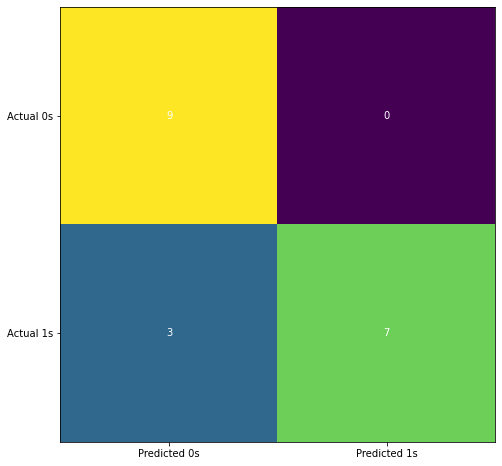

In [ ]:
cm = confusion_matrix(Y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

**Logistic_sklearn**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Applying logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=100, penalty= 'l2', solver='liblinear')
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

print('Classification Report:\n', classification_report(Y_test,Y_pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred))
print("Accuracy score:", accuracy_score(Y_test, Y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       1.00      0.70      0.82        10

    accuracy                           0.84        19
   macro avg       0.88      0.85      0.84        19
weighted avg       0.88      0.84      0.84        19

Confusion Matrix:
 [[9 0]
 [3 7]]
Accuracy score: 0.8421052631578947


In [ ]:
Logistic_accuracy=accuracy_score(Y_test, Y_pred)

In [ ]:
print(Logistic_accuracy)

0.8421052631578947


In [ ]:
accuracies.append(Logistic_accuracy)

In [ ]:
modelName.append("Logistic_i")

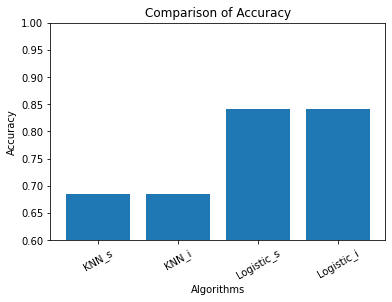

In [ ]:
#Coordinates of x-axis
x=modelName;
# Coordinates of y-axis
y=accuracies;
 
#Bar function to plot the Bar graph
#of the total space available for each bar
#plt.figure(figsize = (15, 10))
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparison of Accuracy")
plt.ylim(0.6, 1.0);
plt.xticks(rotation = 30);
plt.bar(x,y);

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score




In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)

In [ ]:
knc = KNeighborsClassifier()

In [ ]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [ ]:
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [ ]:
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

In [ ]:
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [ ]:
clfs = {
    'SVM SVC' : svc,
    'KNN' : knc,  
    'Logistic Regression': lrc, 
    'Random Forest': rfc, 
    'Ada Boost': abc, 
    'Extra Trees': etc,
}

In [ ]:
def train_classifier(clf, X_train, y_train, X_test, Y_test):

    clf.fit(X_train, Y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(Y_test, y_pred)
    
    precision = precision_score(Y_test, y_pred)

    pred_prob = clf.predict_proba(X_test)
    
    return accuracy, precision, pred_prob


In [ ]:
accuracy_scores = []
precision_scores = []
proba = []

for name, clf in clfs.items():
    
    current_accuracy, current_precision, pred_proba = train_classifier(clf, X_train, Y_train, X_test, Y_test)
    
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision, "\n")
    
    accuracy_scores.append(current_accuracy)

    precision_scores.append(current_precision)

    proba.append(pred_proba)

For  SVM SVC
Accuracy -  0.7368421052631579
Precision -  1.0 

For  KNN
Accuracy -  0.7368421052631579
Precision -  0.6666666666666666 

For  Logistic Regression
Accuracy -  0.8421052631578947
Precision -  1.0 

For  Random Forest
Accuracy -  0.8947368421052632
Precision -  1.0 

For  Ada Boost
Accuracy -  0.9473684210526315
Precision -  1.0 

For  Extra Trees
Accuracy -  0.8421052631578947
Precision -  1.0 



SVM : 0.7666666666666666

KNN : 0.8333333333333334

Logistic Regression : 1.0

Random Forest : 1.0

ADA Boost : 1.0

Extra Trees : 1.0


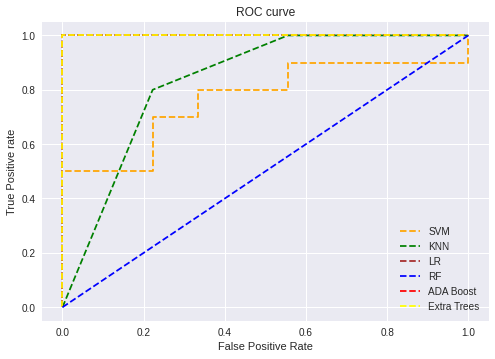

In [ ]:
pred_proba1 = proba[0]
pred_proba2 = proba[1]
pred_proba3 = proba[2]
pred_proba4 = proba[3]
pred_proba5 = proba[4]
pred_proba6 = proba[5]



from sklearn.metrics import roc_curve

# ROC curve for models

fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_proba1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(Y_test, pred_proba2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(Y_test, pred_proba3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(Y_test, pred_proba4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(Y_test, pred_proba5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(Y_test, pred_proba6[:,1], pos_label=1)

# ROC curve for tpr = fpr 

random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# AUC scores

auc_score1 = roc_auc_score(Y_test, pred_proba1[:,1])
auc_score2 = roc_auc_score(Y_test, pred_proba2[:,1])
auc_score3 = roc_auc_score(Y_test, pred_proba3[:,1])
auc_score4 = roc_auc_score(Y_test, pred_proba4[:,1])
auc_score5 = roc_auc_score(Y_test, pred_proba5[:,1])
auc_score6 = roc_auc_score(Y_test, pred_proba6[:,1])

print("SVM :", auc_score1)
print("\nKNN :", auc_score2)
print("\nLogistic Regression :", auc_score3)
print("\nRandom Forest :", auc_score4)
print("\nADA Boost :", auc_score5)
print("\nExtra Trees :", auc_score6)

import matplotlib.pyplot as plt

plt.style.use('seaborn')

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='SVM')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='brown', label='LR')
plt.plot(fpr4, tpr4, linestyle='--',color='blue', label='RF')
plt.plot(fpr5, tpr5, linestyle='--',color='red', label='ADA Boost')
plt.plot(fpr6, tpr6, linestyle='--',color='yellow', label='Extra Trees')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')

plt.show();


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

performance_df

,Algorithm,Accuracy,Precision
0,SVM SVC,0.736842,1.000000
2,Logistic Regression,0.842105,1.000000
3,Random Forest,0.894737,1.000000
4,Ada Boost,0.947368,1.000000
5,Extra Trees,0.842105,1.000000
1,KNN,0.736842,0.666667


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

performance_df1

,Algorithm,variable,value
0,SVM SVC,Accuracy,0.736842
1,Logistic Regression,Accuracy,0.842105
2,Random Forest,Accuracy,0.894737
3,Ada Boost,Accuracy,0.947368
4,Extra Trees,Accuracy,0.842105
5,KNN,Accuracy,0.736842
6,SVM SVC,Precision,1.000000
7,Logistic Regression,Precision,1.000000
8,Random Forest,Precision,1.000000
9,Ada Boost,Precision,1.000000


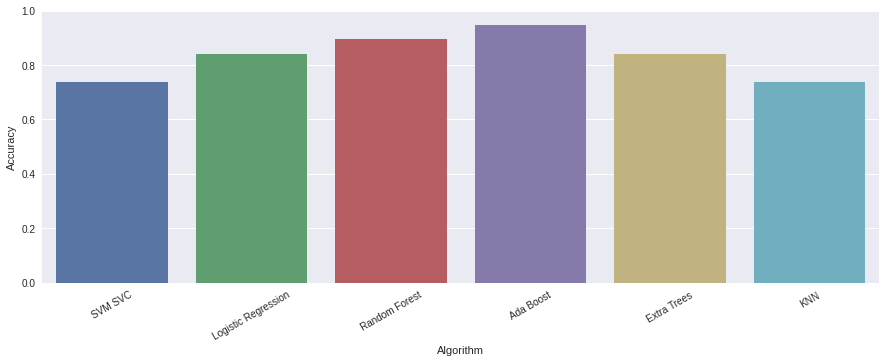

In [ ]:
plt.figure(figsize=(15, 5));

sns.barplot(x = 'Algorithm', y ='Accuracy', data = performance_df);

plt.ylim(0, 1.0);

plt.xticks(rotation = 30);


<Figure size 2520x36 with 0 Axes>

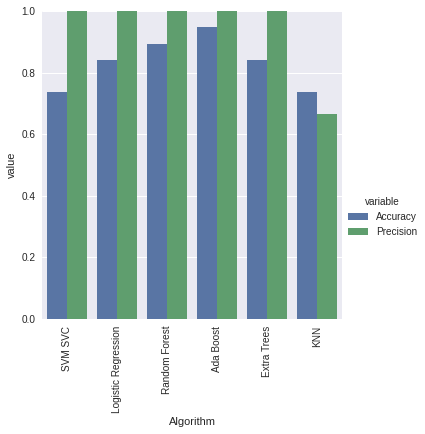

In [ ]:
plt.figure(figsize=(35, 0.5));

sns.catplot(x = 'Algorithm', y='value', hue = 'variable', data=performance_df1, kind='bar');

plt.ylim(0,1.0);

plt.xticks(rotation = 'vertical');
plt.show()

**Different values of K**

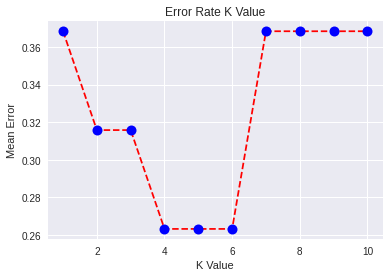

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

error = []

# Calculating error for K values between 1 and 10

for i in range(1, 11):

    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train, Y_train)

    pred_i = knn.predict(X_test)
    
    error.append(np.mean(pred_i != Y_test))


plt.figure(figsize=(6, 4));

plt.plot(range(1,11), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10);

plt.title('Error Rate K Value');

plt.xlabel('K Value');

plt.ylabel('Mean Error');